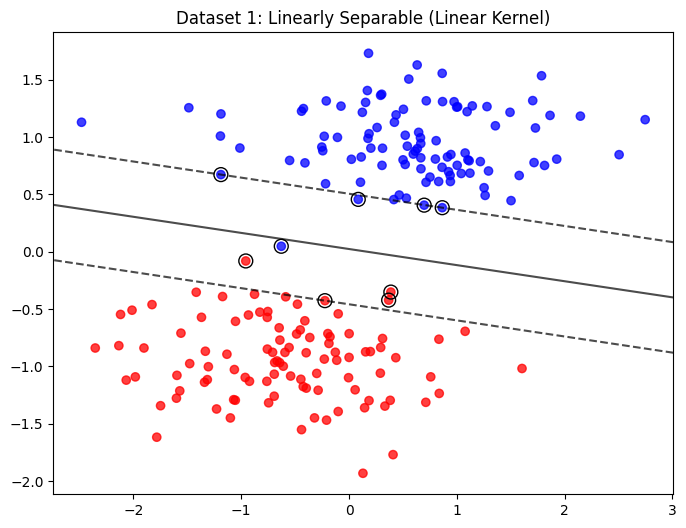

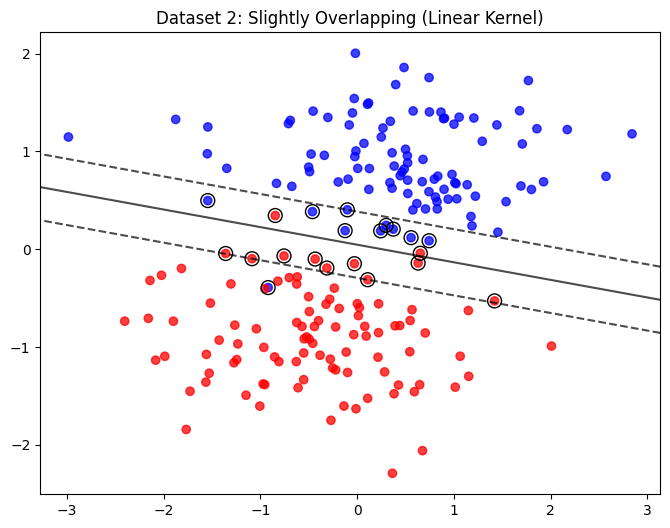

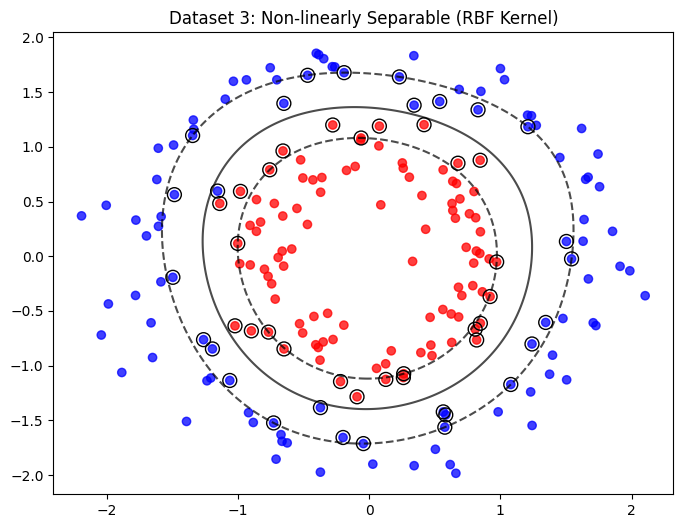

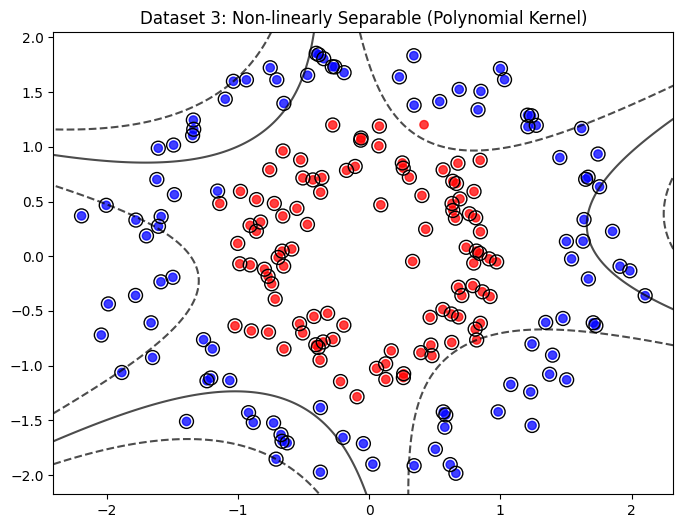

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_circles, make_classification
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler


def plot_decision_boundary(clf, X, y, title):
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', alpha=0.75)
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 500),
                         np.linspace(ylim[0], ylim[1], 500))
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.7,
               linestyles=['--', '-', '--'])
    ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
               linewidth=1, facecolors='none', edgecolors='k')
    plt.title(title)
    plt.show()

#datasets
np.random.seed(0)

# Linearly Separable
X1, y1 = make_blobs(n_samples=200, centers=2, random_state=6)

# Slightly Overlapping
X2, y2 = make_blobs(n_samples=200, centers=2, cluster_std=1.5, random_state=6)

# Non-linearly Separable
X3, y3 = make_circles(n_samples=200, factor=0.5, noise=0.1)


scaler = StandardScaler()
X1 = scaler.fit_transform(X1)
X2 = scaler.fit_transform(X2)
X3 = scaler.fit_transform(X3)


clf1 = SVC(kernel='linear', C=1.0)
clf1.fit(X1, y1)

clf2 = SVC(kernel='linear', C=1.0)
clf2.fit(X2, y2)

clf3 = SVC(kernel='rbf', C=1.0, gamma='auto')
clf3.fit(X3, y3)

# Plot decision boundaries
plot_decision_boundary(clf1, X1, y1, "Dataset 1: Linearly Separable (Linear Kernel)")
plot_decision_boundary(clf2, X2, y2, "Dataset 2: Slightly Overlapping (Linear Kernel)")
plot_decision_boundary(clf3, X3, y3, "Dataset 3: Non-linearly Separable (RBF Kernel)")

# Train SVM with Polynomial kernel for Dataset 3
clf4 = SVC(kernel='poly', degree=3, C=1.0, gamma='auto')
clf4.fit(X3, y3)
plot_decision_boundary(clf4, X3, y3, "Dataset 3: Non-linearly Separable (Polynomial Kernel)")
